In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

In [4]:
df.sample()

,User ID,Gender,Age,EstimatedSalary,Purchased
357,15671387,Female,41,72000,0


In [12]:
df.shape

(400, 5)

In [13]:
df = df.iloc[:,2:]

In [16]:
df.sample(5)

,Age,EstimatedSalary,Purchased
104,19,21000,0
304,40,60000,0
221,35,91000,1
2,26,43000,0
20,45,22000,1


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.3, random_state=1)

X_train.shape, X_test.shape

((280, 2), (120, 2))

In [18]:
# STANDARD SCALER

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

StandardScaler()

In [23]:
# transform train and test sets

X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [24]:
scaler.mean_

array([3.71000000e+01, 6.90571429e+04])

In [25]:
# since the standard scaler takes a pandas dataframe but returns numpy arrays
# converting X_train_scaled and X_test_scaled to df

In [27]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns= X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [28]:
X_train_scaled

,Age,EstimatedSalary
0,-0.979100,-1.110590
1,-0.203575,0.056697
2,1.153594,-1.198137
3,-0.203575,0.640340
4,-0.009694,0.173426
...,...,...
275,1.444415,0.611158
276,-1.657685,-1.344048
277,1.347475,-1.344048
278,0.862772,0.290154


In [29]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.1,69057.1
std,10.3,34328.8
min,18.0,15000.0
25%,29.0,43000.0
50%,37.0,67000.0
75%,43.5,85000.0
max,60.0,150000.0


In [31]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.0,-0.1
75%,0.6,0.5
max,2.2,2.4


In [32]:
# LET US SEE THE EFFECT OF SCALING 

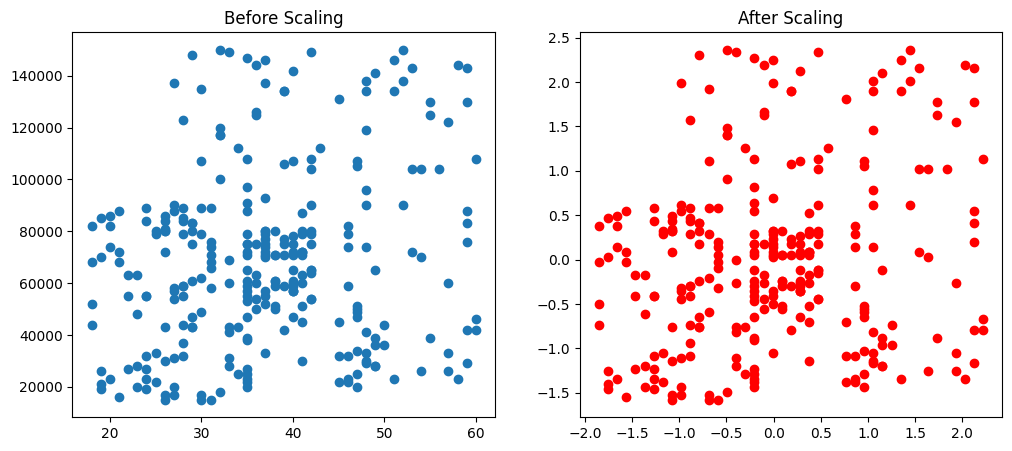

In [34]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color = "Red")
ax2.set_title("After Scaling")
plt.show()

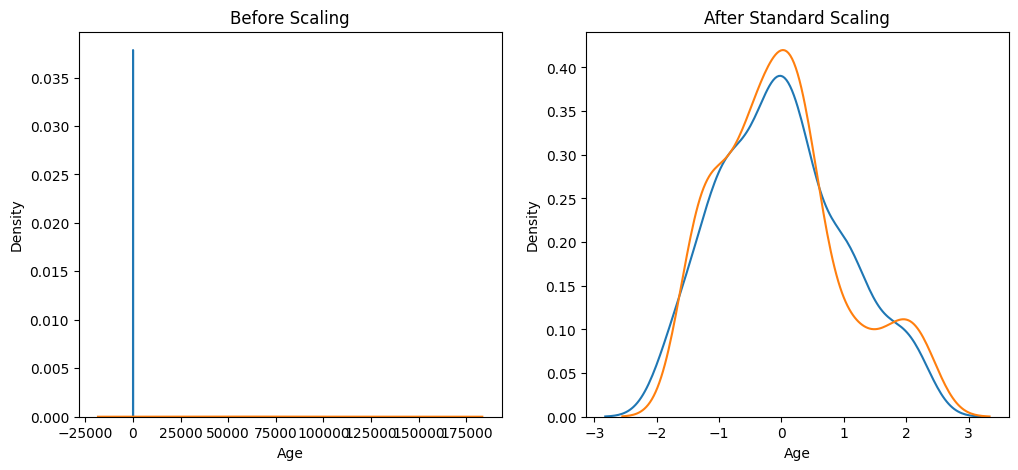

In [41]:

# Create a figure and two subplots side by side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# After scaling
ax2.set_title("After Standard Scaling")
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)

plt.show()
